# Federated Radiomics

In [19]:
import pandas as pd
import re
import os
from glob2 import glob

In [24]:
root_dir = os.getenv("BATCHES_INPUT_DIR", '../radiomics-federated-central/batch')
batch_dir = os.path.join(root_dir, sorted(os.listdir(root_dir))[-1])
print(f"Root Dir: {batch_dir}")

dfs = []
expr = re.compile(".*radiomics-federated-operator/0/(.*)/radiomics-packaging-operator/(.*)/(.*)--(.*)--(.*)_radiomics.csv")
for csv_filename in glob(f"{batch_dir}/radiomics-federated-operator/**/*.csv"):
    try:
        match = expr.match(csv_filename)
        site = match.group(1)
        series_uid = match.group(3)
        seg_id = int(match.group(4))
        label = match.group(5)

        df = pd.read_csv(csv_filename, sep=';')
        df["site"] = site
        df["series_uid"] = series_uid
        df["seg_id"] = seg_id
        df["label"] = label
        dfs.append(df)
    except Exception as e:
        print(e)
        
df = pd.concat(dfs)

Root Dir: ../radiomics-federated-central/batch/batch-2023-01-16_14-51-02


## Descriptive Statistics

In [25]:
df[["site", "label", "series_uid"]].groupby(["site", "label"]).size()

site   label            
siteA  esophagus            20
       heart                 1
       lung                 40
       neoplasm,_primary    22
       spinal_cord          16
siteB  esophagus            13
       heart                 1
       lung                 47
       neoplasm,_primary    23
       spinal_cord          16
dtype: int64

In [22]:
df.groupby("label").mean()

,SliceNumber,First Order::Mean,First Order::Unbiased Variance,First Order::Biased Variance,First Order::Skewness,First Order::Kurtosis,First Order::Median,First Order::Minimum,First Order::Maximum,First Order::Range,...,First Order::80th Percentile,First Order::85th Percentile,First Order::90th Percentile,First Order::95th Percentile,First Order::Interquartile Range,First Order::Image Dimension,First Order::Voxel Space,First Order::Voxel Volume,Unnamed: 56,seg_id
label,,,,,,,,,,,,,,,,,,,,,
lung,0.0,-734.744,37684.2,37684.9,1.92503,6.36485,-792.057,-1023.0,416.0,1439.0,...,-652.717,-570.554,-448.367,-258.695,149.022,3.0,2.86102,2.86102,NaN,3.0


<AxesSubplot:>

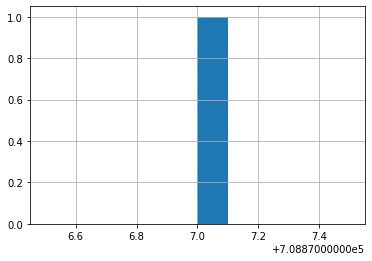

In [13]:
df[df.label == "lung"]['First Order::Number Of Voxels'].hist()

<AxesSubplot:>

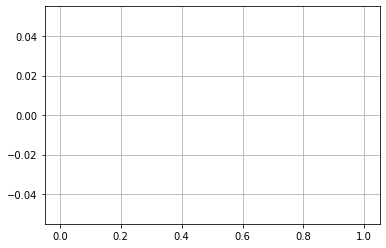

In [14]:
df[df.label == "spinal_cord"]['First Order::Number Of Voxels'].hist()